<a href="https://colab.research.google.com/github/sethuraman20/sethuraman20/blob/main/Task%3Acolor%20identification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Color Identification in an Images
IoT & Computer Vision

Author: Saran D

In [ ]:
#Importing basic Necessary Libraries
import cv2
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.pyplot as plt
from collections import Counter
import os


The type of this input is <class 'numpy.ndarray'>
Shape: (1333, 2000, 3)


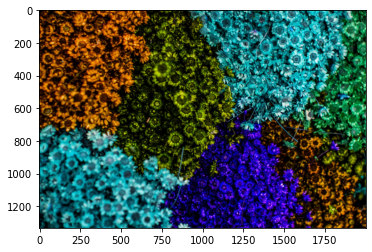

In [ ]:
img = cv2.imread('/content/iot images.jpg')
print("The type of this input is {}".format(type(img)))
print("Shape: {}".format(img.shape))
plt.imshow(img)


By default, OpenCV reads the image in Blue-Green-Red(BGR) format, we have to convert it into Red-Green-Blue(RGB) format to get original image

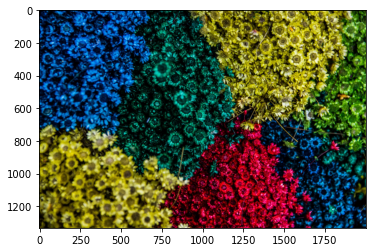

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

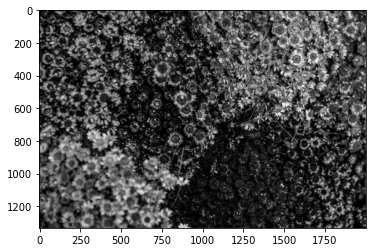

In [ ]:
#In Some cases, we want image in Black and White format so for that we are using following lines of codes for converting RGB image to Grayscale image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

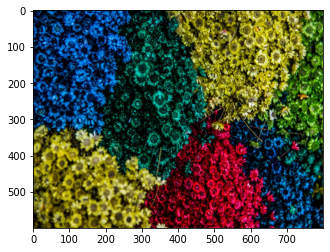

In [ ]:
# Resizing the image
resized_img = cv2.resize(img, (800, 600))
plt.imshow(resized_img)

In [ ]:
#RGB2HEX conversion
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

Read image in RGB color space¶
First, we read the file using imread and then change its color space before returning it.

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
#Get color of an image
def get_colors(image, number_of_colors, show_chart):
    # First, we resize the image to the size 800 x 600.KMeans expects the input to be of two dimensions, 
    #so we use Numpy’s reshape function to reshape the image data.
    modified_image = cv2.resize(image, (800, 600), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    #KMeans algorithm creates clusters based on the supplied count of clusters. In our case, it will form clusters of colors
    #and these clusters will be our top colors. We then fit and predict on the same image to extract the prediction
    #into the variable labels.
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    #We use Counter to get count of all labels
    counts = Counter(labels)
    # sort to ensure correct color percentage
    #counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

Now we call this method as get_colors(get_image(‘C:/Users/Om Misal/Documents/IOT&COMPUTER_VISION_INTERNSHIP/TASK1/Color_Identification/variety-paints.jpg’), 10, True) and our pie chart appears with top 10 colors

[array([  7.059523  , 125.8873072 , 192.25140993]),
 array([ 8.53988562, 11.28778545, 11.17938079]),
 array([65.00515856, 73.48870869, 10.41971758]),
 array([174.20674335, 170.71720149,  29.04656124]),
 array([118.43036641, 120.46453677,  21.54678312]),
 array([202.82022012,   9.67489122,  58.55582288]),
 array([198.96385542, 200.44604793, 117.29648263]),
 array([ 3.51920469, 43.93987891, 57.47321119]),
 array([  5.69686305,  86.72119357, 116.36794185]),
 array([103.09927732,   2.79812395,  15.62654208])]

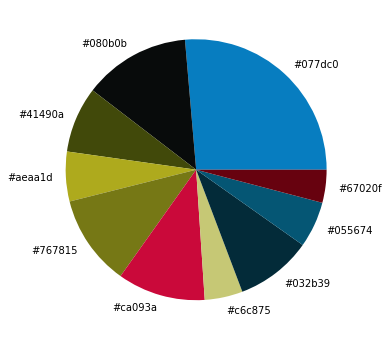

In [ ]:
get_colors(get_image('/content/iot images.jpg'), 10, True)

so the color identification of the image is in the form of pie chart